<a href="https://colab.research.google.com/github/santr4/Kaggle/blob/main/Imdb_reviews/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment analysis on the reviews given by the viewers in the imdb.

Our dataset contains two columns - 1) reviews and 2) sentiments.

So we have to figure out a model which best describes the sentiments of the viewers.

importing necessary libraries

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid",{"grid.linestyle":":"})

In [211]:

df_review = pd.read_csv("/content/IMDB Dataset.csv")
df_review
print(df_review.shape)

(50000, 2)


This model contains 50000 datasets which is very large and to train this big model takes a lot of time so we will take 10000 samples where 9000 positive and 10000 negative.

In [212]:
df_positive = df_review[df_review['sentiment']== 'positive'][:9000]
df_negative = df_review[df_review['sentiment'] == 'negative'][:1000]

In [213]:
df_review_imdb = pd.concat([df_positive,df_negative])

In [214]:
print(df_review_imdb.shape)

(10000, 2)


When one class has a lot a lot of observations and the other class has lower observations. This is known as imbalanced classes.

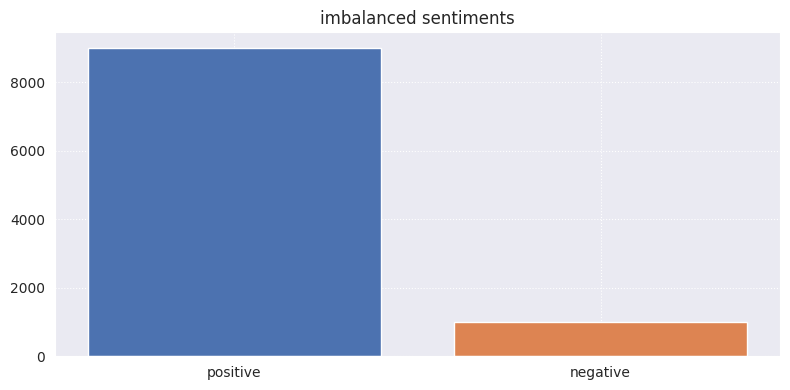

<Figure size 640x480 with 0 Axes>

In [215]:
colors = sns.color_palette('deep')
plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['positive','negative'],height=df_review_imdb.value_counts(['sentiment']),color=colors[:2])
plt.title('imbalanced sentiments')
plt.show()
plt.savefig('imbalanced sentiments.png')
plt.savefig('imbalanced sentiments.jpg')

I am using RandomUnderSampler from imblearn library to reduce the samples of the positive sentiments so that we can remove this imbalance.

In [216]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
df_review_bal,df_review_bal['sentiment']=rus.fit_resample(df_review_imdb[['review']],df_review_imdb['sentiment'])

df_review_bal
print(df_review_bal.shape)

(2000, 2)


We can compare the imbalance and balanced dataset.

In [217]:
x = df_review_imdb.value_counts('sentiment')  # imbalanced
y = df_review_bal.value_counts('sentiment')   # balanced
print(x)
print(y)

sentiment
positive    9000
negative    1000
dtype: int64
sentiment
negative    1000
positive    1000
dtype: int64


Now we will split the dataset into input and output dataset

In [218]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(df_review_bal,test_size = 0.3,random_state=42)

In [219]:
train_x,train_y = train['review'],train['sentiment']
test_x,test_y = test['review'],test['sentiment']

In [220]:
train_y.value_counts()

positive    702
negative    698
Name: sentiment, dtype: int64

In [221]:
test_y.value_counts()

negative    302
positive    298
Name: sentiment, dtype: int64

Now we need to convert the text reviews into numerical values as the model understands that only. We will use ConverVectorizer and tf_and_idf.

The TfidfVectorizer class from sklearn.feature_extraction module is used for transforming the text data to tfidf matrix. tfidf is the object of the class and it stops the common english words like - 'in','the',etc. Then the train_x and test_x is fit with the tfidf matrix into train_x_vector and test_x_vector.

In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
test_x_vector = tfidf.fit_transform(test_x)
print(train_x_vector.shape)

(1400, 21091)


Also we will transform the test_x_vector.

error : ValueError                                Traceback (most recent call last)
<ipython-input-77-96b430185009> in <cell line: 1>()
----> 1 pd.DataFrame.sparse.from_spmatrix(train_x_vector,
      2                                   index=train_x.index,
      3                                   columns=tfidf.get_feature_names_out())

1 frames
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/sparse/accessor.py in _prep_index(data, index, columns)
    391
    392         if len(columns) != K:
--> 393             raise ValueError(f"Column length mismatch: {len(columns)} vs. {K}")
    394         if len(index) != N:
    395             raise ValueError(f"Index length mismatch: {len(index)} vs. {N}")

ValueError: Column length mismatch: 13136 vs. 21091

to solve the above issue -
To resolve this issue, you should review the code and verify the following:

1)Check if the tfidf object used to obtain the feature names is trained on the same data or has the same vocabulary as the train_x_vector sparse matrix.

2)Confirm that the train_x_vector sparse matrix is correctly generated using the appropriate data.

3)Make sure that the tfidf.get_feature_names_out() method returns the correct number of feature names.

By addressing these points, you should be able to resolve the column length mismatch error and successfully create the sparse DataFrame using pd.DataFrame.sparse.from_spmatrix().

In [223]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

ValueError: ignored

Model selection - here we can use different models to find the prediction.

SVM - support vector machine or support vector regression